Files available in 'data':
1. sample.py
2. sample1.py


Enter the number of the file to analyze (1-2):  2



📂 Analyzing file: data\sample1.py
data\sample1.py:8:1: E302 expected 2 blank lines, found 1
data\sample1.py:8:23: E203 whitespace before ','
data\sample1.py:8:24: E231 missing whitespace after ','
data\sample1.py:9:3: E111 indentation is not a multiple of 4
data\sample1.py:12:1: E302 expected 2 blank lines, found 1
data\sample1.py:13:5: E113 unexpected indentation
data\sample1.py:19:1: E302 expected 2 blank lines, found 1
data\sample1.py:24:1: E302 expected 2 blank lines, found 1

=== Analysis Results ===
PEP8 Violations: 8
Syntax Errors: 1
Score: 7.2/10

=== Suggestions ===
👉 Line 12: expected ':' – Hint: Check function/class definitions and missing colons/indentation.
👉 Fix PEP8 style issues using autopep8 or black.
👉 PEP8: 1       E111 indentation is not a multiple of 4
👉 PEP8: 1       E113 unexpected indentation
👉 PEP8: 1       E203 whitespace before ','
👉 PEP8: 1       E231 missing whitespace after ','
👉 PEP8: 4       E302 expected 2 blank lines, found 1

📊 Generating visualizati

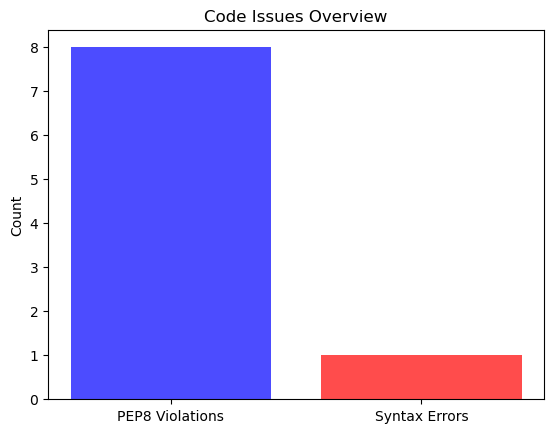

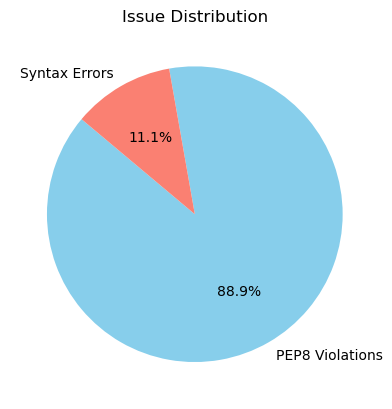


✅ JSON report saved at: reports/analysis_report.json
✅ HTML report saved at: reports/analysis_report.html

=== Cyclomatic Complexity & Maintainability Index ===
⏩ Skipping complexity analysis due to syntax errors.

=== Final Summary ===
📂 File: data\sample1.py
🔹 PEP8 Violations: 8
🔹 Syntax Errors: 1
🔹 Score: 7.2/10
🔹 Cyclomatic Complexity per function:
    • add_numbers (line 3): 1 → Simple function, easy to test
    • divide_numbers (line 6): 2 → Simple function, easy to test
    • complex_function (line 12): 3 → Simple function, easy to test
🔹 Maintainability Index: 75.78 → Moderate maintainability


'reports/analysis_report.html'

In [31]:
# ==========================================================
# 📊 Code Quality Checker - Final Internship Project
# ==========================================================

from src.pep8_checker import check_pep8
from src.syntax_checker import check_syntax
from src.scoring import calculate_score
from src.suggestions import generate_suggestions
from src.visualizer import visualize_issues
from src.report_generator import save_report, save_html_report
from src.features import analyze_complexity

import os

# --- Step 1: Dynamic File Selection ---
data_folder = "data"
print(f"Files available in '{data_folder}':")
files = [f for f in os.listdir(data_folder) if f.endswith(".py")]
for idx, f in enumerate(files, start=1):
    print(f"{idx}. {f}")

file_choice = input(f"Enter the number of the file to analyze (1-{len(files)}): ")
try:
    file_index = int(file_choice) - 1
    if file_index < 0 or file_index >= len(files):
        raise ValueError
    filepath = os.path.join(data_folder, files[file_index])
except:
    print("Invalid selection. Defaulting to the first file.")
    filepath = os.path.join(data_folder, files[0])

print(f"\n📂 Analyzing file: {filepath}")

# --- Step 2: Run PEP8 & Syntax Analysis ---
pep8_result = check_pep8(filepath)
syntax_result = check_syntax(filepath)
score = calculate_score(pep8_result, syntax_result)
suggestions = generate_suggestions(pep8_result, syntax_result)

print("\n=== Analysis Results ===")
print(f"PEP8 Violations: {pep8_result['violations']}")
print(f"Syntax Errors: {syntax_result['errors']}")
print(f"Score: {score}/10")

print("\n=== Suggestions ===")
if suggestions:
    for s in suggestions:
        print("👉", s)
else:
    print("✅ No suggestions needed. Code looks clean!")

# --- Step 3: Visualization ---
print("\n📊 Generating visualizations...")
visualize_issues(pep8_result, syntax_result)

# --- Step 4: Save Reports ---
os.makedirs("reports", exist_ok=True)
report_data = {
    "pep8": pep8_result,
    "syntax": syntax_result,
    "score": score,
    "suggestions": suggestions
}
json_report_path = save_report("reports/analysis_report.json", report_data)
html_report_path = save_html_report("reports/analysis_report.html", report_data, pep8_result, syntax_result)
print(f"\n✅ JSON report saved at: {json_report_path}")
print(f"✅ HTML report saved at: {html_report_path}")

# --- Step 5: Complexity Analysis & Meaning ---
print("\n=== Cyclomatic Complexity & Maintainability Index ===")
if syntax_result["errors"] > 0:
    print("⏩ Skipping complexity analysis due to syntax errors.")
else:
    complexity_result = analyze_complexity(filepath)
    if "error" in complexity_result:
        print(f"⏩ Complexity analysis error: {complexity_result['error']}")
    else:
        def interpret_cc(cc):
            if cc <= 5:
                return "Simple function, easy to test"
            elif cc <= 10:
                return "Moderate complexity, review recommended"
            elif cc <= 20:
                return "Complex function, may need refactoring"
            else:
                return "Very complex, high risk of bugs"

        def interpret_mi(mi):
            if mi >= 85:
                return "Highly maintainable"
            elif mi >= 65:
                return "Moderate maintainability"
            else:
                return "Difficult to maintain"

        for func in complexity_result["cyclomatic_complexity"]:
            warning = " ⚠️ High complexity!" if func['complexity'] > 10 else ""
            meaning = interpret_cc(func['complexity'])
            print(f"Function {func['name']} (line {func['lineno']}): "
                  f"Complexity = {func['complexity']}{warning} → {meaning}")

        mi_value = complexity_result['maintainability_index']
        mi_meaning = interpret_mi(mi_value)
        print(f"\nMaintainability Index: {mi_value:.2f} → {mi_meaning}")

# --- Step 6: Final Summary ---
print("\n=== Final Summary ===")
print(f"📂 File: {filepath}")
print(f"🔹 PEP8 Violations: {pep8_result['violations']}")
print(f"🔹 Syntax Errors: {syntax_result['errors']}")
print(f"🔹 Score: {score}/10")

if complexity_result and "error" not in complexity_result:
    print(f"🔹 Cyclomatic Complexity per function:")
    for func in complexity_result["cyclomatic_complexity"]:
        warning = " ⚠️ High complexity!" if func['complexity'] > 10 else ""
        meaning = interpret_cc(func['complexity'])
        print(f"    • {func['name']} (line {func['lineno']}): {func['complexity']}{warning} → {meaning}")
    print(f"🔹 Maintainability Index: {mi_value:.2f} → {mi_meaning}")
else:
    print("🔹 Complexity analysis skipped or failed due to errors.")

# Save complexity in report
report_data["complexity"] = complexity_result
save_report("reports/analysis_report.json", report_data)
save_html_report("reports/analysis_report.html", report_data, pep8_result, syntax_result)


NameError: name 'commit' is not defined